In [1]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!unzip dataset.zip?dl=0

unzip:  cannot find any matches for wildcard specification "dataset.zip?dl=0".

No zipfiles found.


In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import random

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Building our Model To train the data 

In [2]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [3]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [4]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "./content/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 7178 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [5]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "./content/train", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

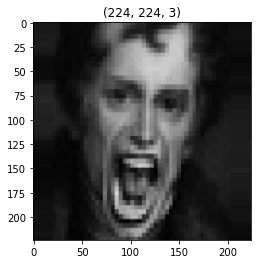

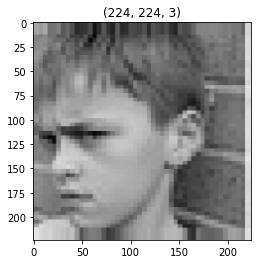

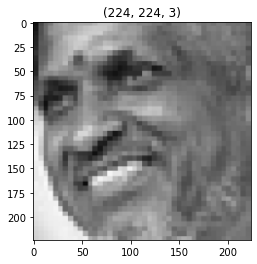

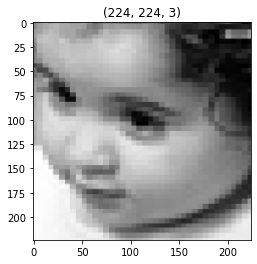

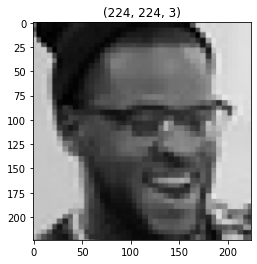

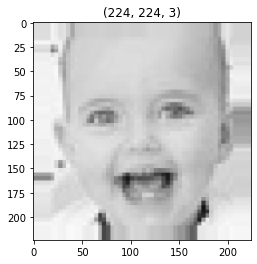

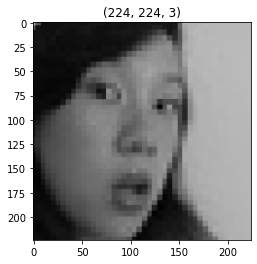

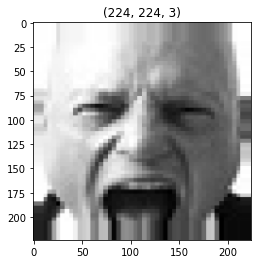

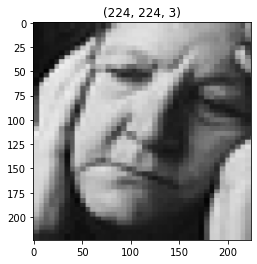

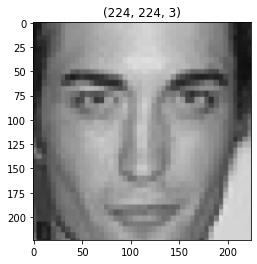

In [6]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [7]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [11]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 225, 
                           epochs=30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

<ipython-input-11-6fecd454900f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
225/225 [==============================] - ETA: 0s - loss: 4.8755 - accuracy: 0.5784
Epoch 1: val_accuracy improved from 0.60938 to 0.63281, saving model to best_model.h5
225/225 [==============================] - 140s 622ms/step - loss: 4.8755 - accuracy: 0.5784 - val_loss: 4.1064 - val_accuracy: 0.6328
Epoch 2/30
225/225 [==============================] - ETA: 0s - loss: 4.6577 - accuracy: 0.6119 
Epoch 2: val_accuracy improved from 0.63281 to 0.66406, saving model to best_model.h5
225/225 [==============================] - 2886s 13s/step - loss: 4.6577 - accuracy: 0.6119 - val_loss: 4.7969 - val_accuracy: 0.6641
Epoch 3/30
225/225 [==============================] - ETA: 0s - loss: 4.8002 - accuracy: 0.6279
Epoch 3: val_accuracy improved from 0.66406 to 0.75000, saving model to best_model.h5
225/225 [==============================] - 166s 740ms/step - loss: 4.8002 - accuracy: 0.6279 - val_loss: 2.6292 - val_accuracy: 0.7500
Epoch 4/30
225/225 [=============================

In [12]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("best_model.h5")

In [13]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

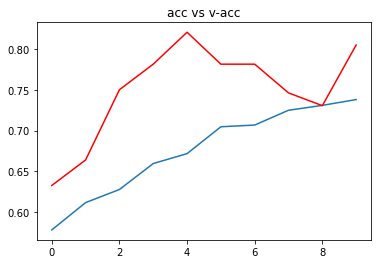

In [14]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

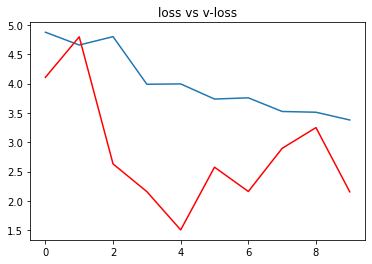

In [15]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [16]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

 the image is of neutral


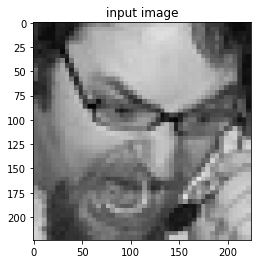

 the image is of angry


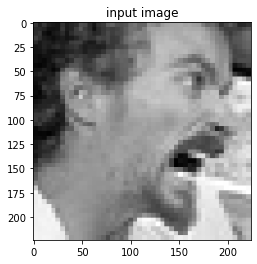

 the image is of sad


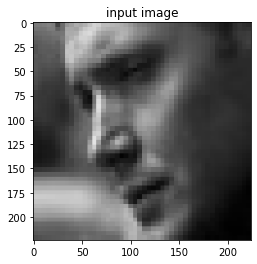

 the image is of sad


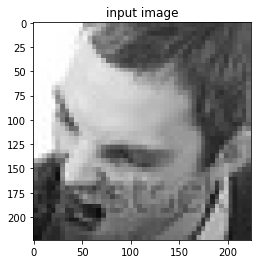

 the image is of angry


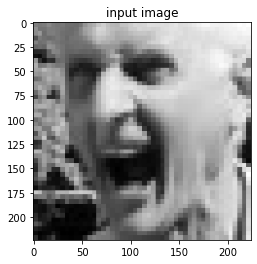

 the image is of angry


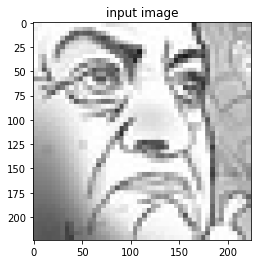

 the image is of angry


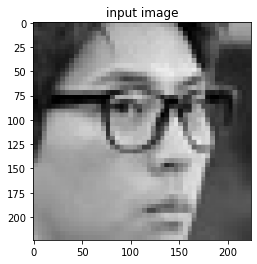

 the image is of angry


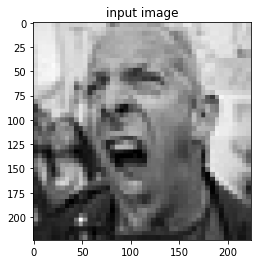

 the image is of angry


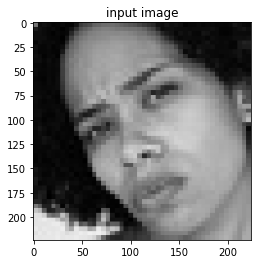

 the image is of angry


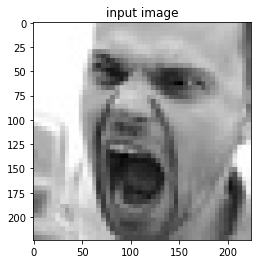

 the image is of sad


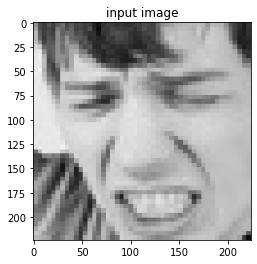

 the image is of neutral


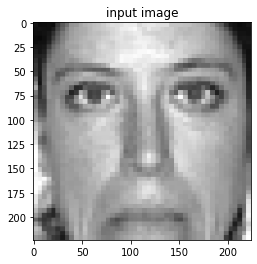

 the image is of happy


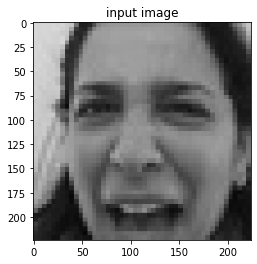

 the image is of disgust


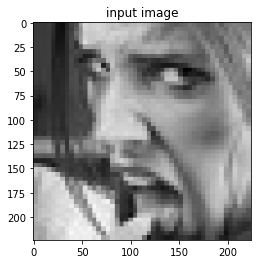

 the image is of disgust


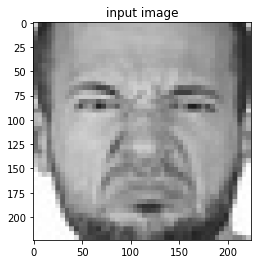

 the image is of sad


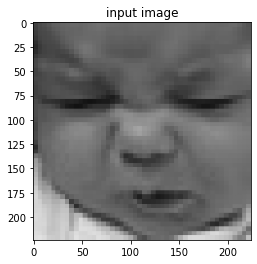

 the image is of disgust


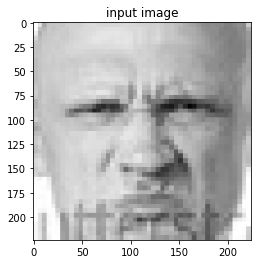

 the image is of disgust


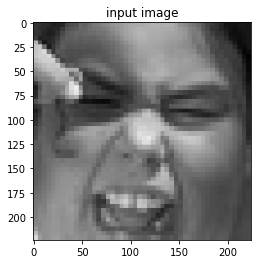

 the image is of disgust


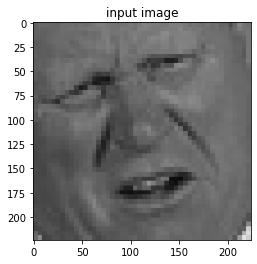

 the image is of disgust


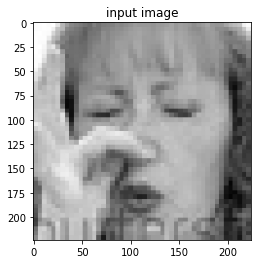

 the image is of disgust


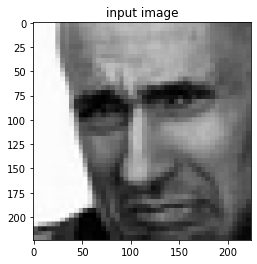

 the image is of fear


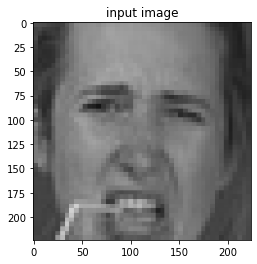

 the image is of sad


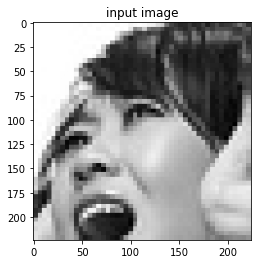

 the image is of neutral


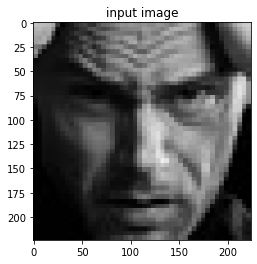

 the image is of fear


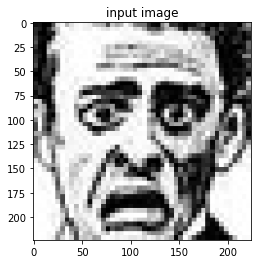

 the image is of sad


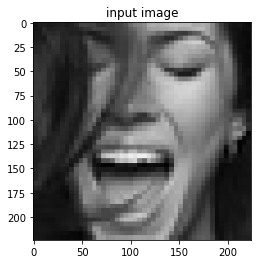

 the image is of fear


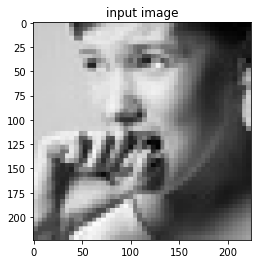

 the image is of fear


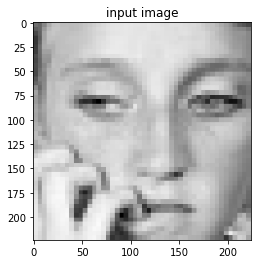

 the image is of fear


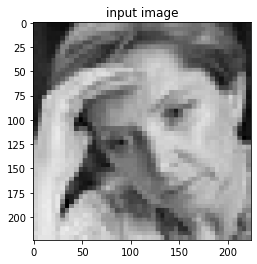

 the image is of sad


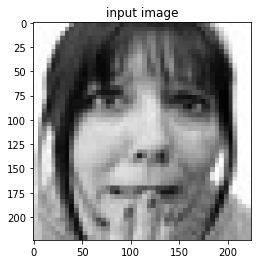

 the image is of neutral


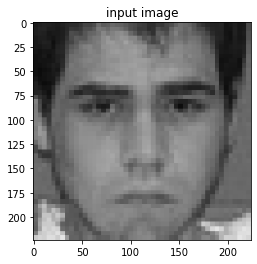

 the image is of fear


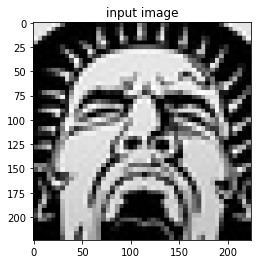

 the image is of sad


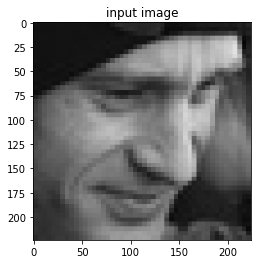

 the image is of happy


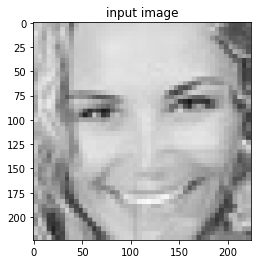

 the image is of happy


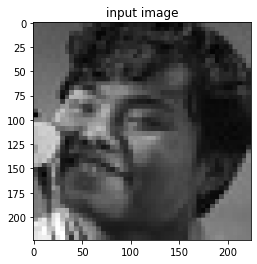

 the image is of happy


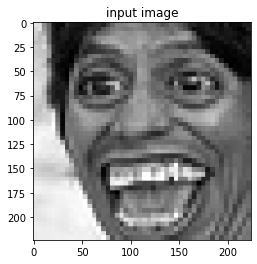

 the image is of happy


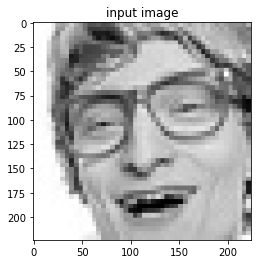

 the image is of happy


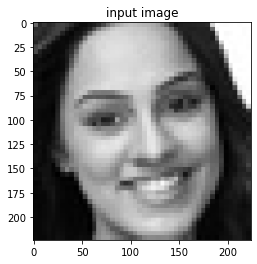

 the image is of happy


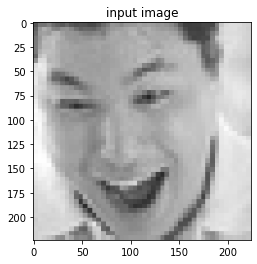

 the image is of happy


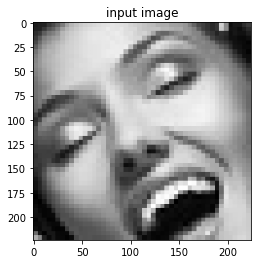

 the image is of happy


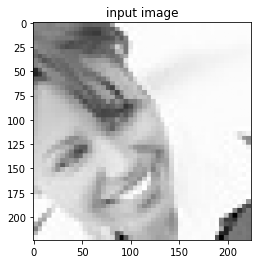

 the image is of happy


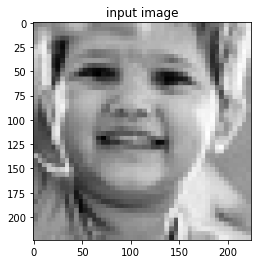

 the image is of happy


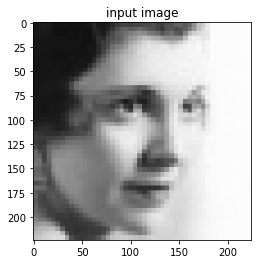

 the image is of happy


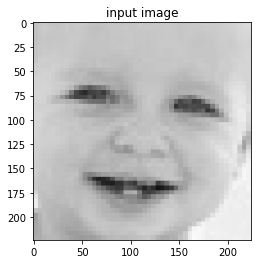

 the image is of fear


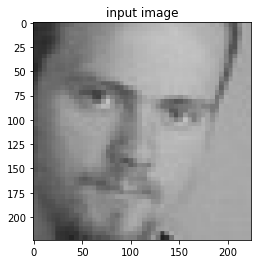

 the image is of neutral


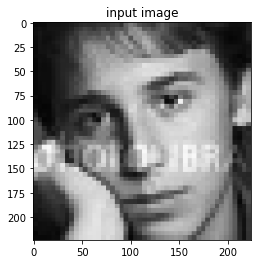

 the image is of neutral


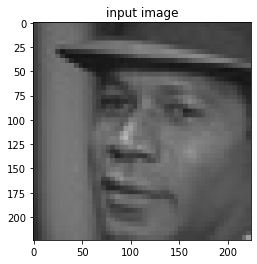

 the image is of neutral


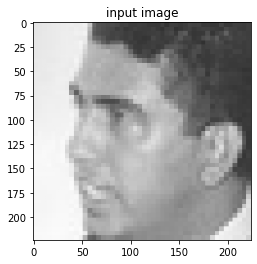

 the image is of neutral


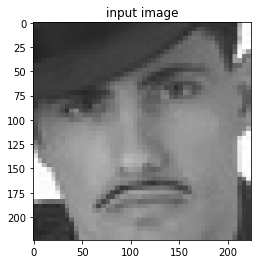

 the image is of neutral


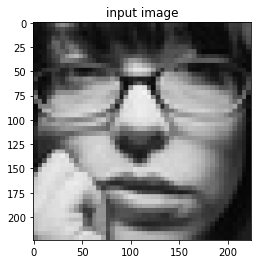

 the image is of neutral


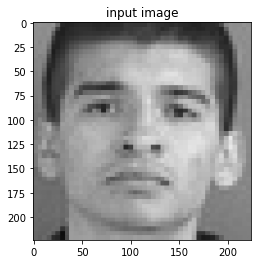

 the image is of neutral


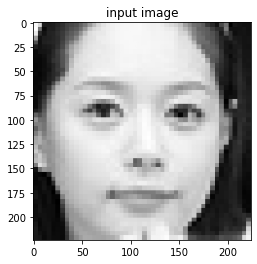

 the image is of neutral


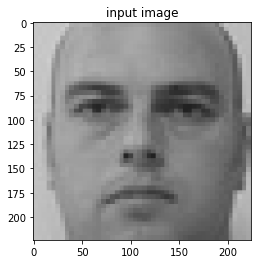

 the image is of neutral


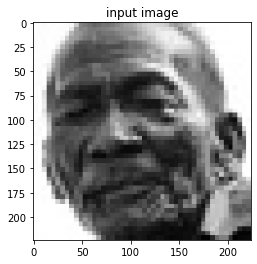

 the image is of neutral


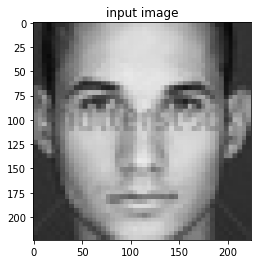

 the image is of neutral


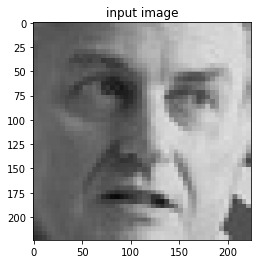

 the image is of sad


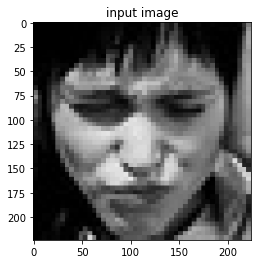

 the image is of sad


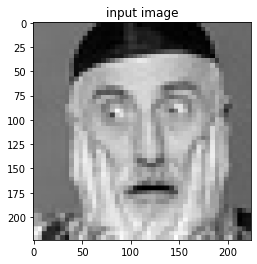

 the image is of sad


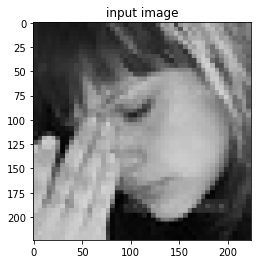

 the image is of sad


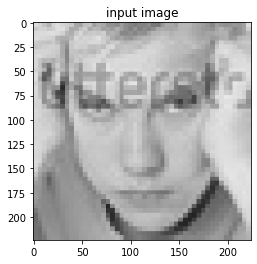

 the image is of sad


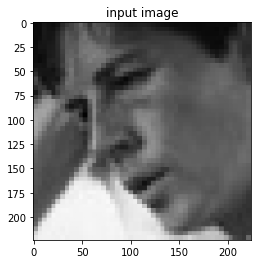

 the image is of sad


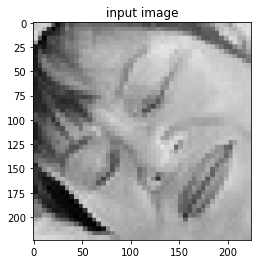

 the image is of fear


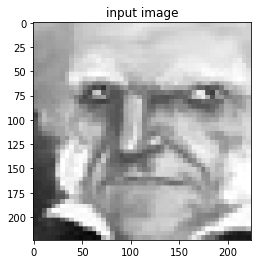

 the image is of sad


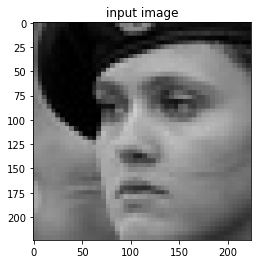

 the image is of sad


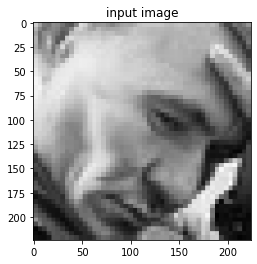

 the image is of sad


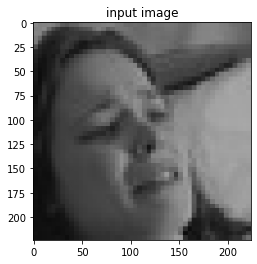

 the image is of surprise


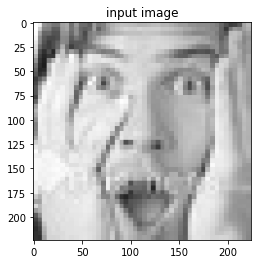

 the image is of surprise


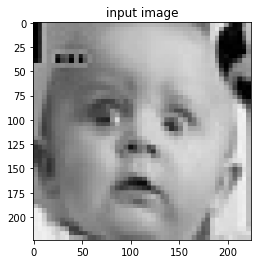

 the image is of surprise


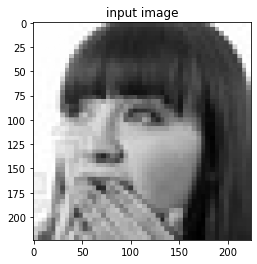

 the image is of surprise


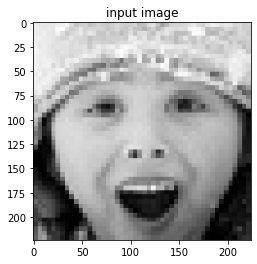

 the image is of surprise


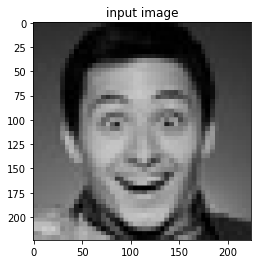

 the image is of surprise


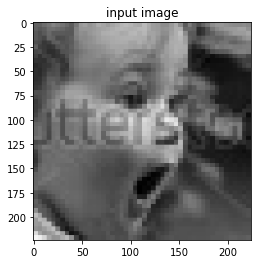

 the image is of surprise


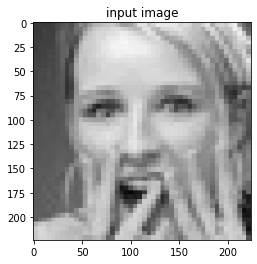

 the image is of surprise


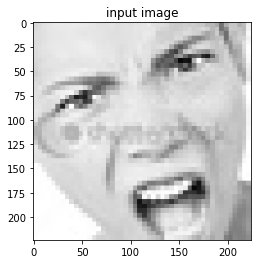

 the image is of surprise


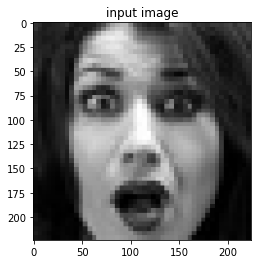

 the image is of neutral


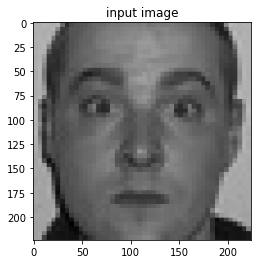

 the image is of surprise


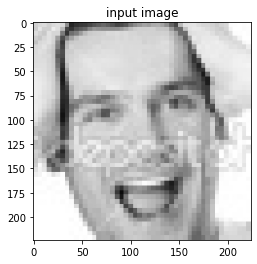

'\nimg = load_img(path, target_size=(224,224) )\n\ni = img_to_array(img)/255\ninput_arr = np.array([i])\ninput_arr.shape\n\npred = np.argmax(model.predict(input_arr))\n\nprint(f" the image is of {op[pred]}")\n\n# to display the image  \nplt.imshow(input_arr[0])\nplt.title("input image")\nplt.show()'

In [17]:
# path for the image to see if it predics correct class

#path = "./test/happy/download ("+str(random.randint(1,17))+").jpg"

#path = "./test/happy/PrivateTest_3524293.jpg"

classes = ["angry","disgust","fear","happy","neutral","sad","surprise"]
pwd = './test/test'

for category in classes:
    path = os.path.join(pwd,category)
    count=10
    for img_name in os.listdir(path):
        if count<0:
            break
        count=count-1
        img_path = os.path.join(path,img_name)
        img = load_img(img_path, target_size=(224,224) )
        i = img_to_array(img)/255
        input_arr = np.array([i])
        input_arr.shape
        pred = np.argmax(model.predict(input_arr))
        print(f" the image is of {op[pred]}")
        # to display the image  
        plt.imshow(input_arr[0])
        plt.title("input image")
        plt.show()
        
    
    
'''
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()'''

In [15]:
import urllib.request
import urllib.parse
import re
import webbrowser as  wb

import random

def findYT(search):

    #final 
    query_string = urllib.parse.urlencode({"search_query":search+"song"})
    html_content = urllib.request.urlopen("http://www.youtube.com/results?"+query_string)
    search_results = re.findall(r'url\"\:\"/watch\?v=(.*?(?=\"))',html_content.read().decode())
    if search_results:
        url="http://www.youtube.com/watch?v="+search_results[0]
        print(url)
        wb.open_new(url)
    else:
        print('no url')

In [2]:
import os
import cv2
import numpy as np
from keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.image import load_img, img_to_array 
from keras.models import  load_model
import matplotlib.pyplot as plt
import numpy as np

# load model
model = load_model("best_model.h5")


face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


cap = cv2.VideoCapture(0)

while True:
    ret, test_img = cap.read()  # captures frame and returns boolean value and captured image
    #print(ret)
    #cv2.imshow('Frame',test_img)
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
        roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
        roi_gray = cv2.resize(roi_gray, (224, 224))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ', resized_img) 
    
    
    #function which play music or suggest music
    
    if cv2.waitKey(1) & 0xFF == ord('m'):
        findYT(predicted_emotion)
        cap.release()
        cv2.destroyAllWindows()
        

    if cv2.waitKey(1) & 0xFF== ord('q'):  # wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows()

RemoteDisconnected: Remote end closed connection without response

In [27]:
import webbrowser 

def findYT(search):
    
    link = "https://gaana.com/search/"+search
    webbrowser.open_new(link)

In [28]:
findYT("sad song")

In [1]:
import urllib.request

In [2]:
import urllib.request
import urllib.parse
import re
import webbrowser as  wb
import random


In [3]:
query_string = urllib.parse.urlencode({"search":input()})
html_content = urllib.request.urlopen("https://open.spotify.com/search/"+query_string+"song")
search_results = re.findall(r'url\"\:\"/watch\?v=(.*?(?=\"))',html_content.read().decode())
print(search_results)
if search_results:
    url="http://www.youtube.com/watch?v="+search_results[random.randint(0,len(search_results))]
    print(url)
    wb.open_new(url)
else:
    print('no url')

sad 
[]
no url


In [1]:
import urllib.request
import urllib.parse
import re                         
import webbrowser as wb
import random 

In [2]:
def finalPlay(emotion): 
    query_string = urllib.parse.urlencode({"search_query":emotion})
    html_content = urllib.request.urlopen("http://www.youtube.com/results?"+query_string+"song")
    search_results = re.findall(r'url\"\:\"/watch\?v=(.*?(?=\"))',html_content.read().decode())
    print(search_results)
    if search_results:
        url="http://www.youtube.com/watch?v="+search_results[random.randint(0,len(search_results))]
        print(url)
        wb.open_new(url)
    else:
        print('no url') 
        

#words = search.split()
#link = "http://www.youtube.com/results?search_query="
#for i in words:
#link+= i+"+"
#webbrowser.open_new(link[:-1])
    

In [31]:
finalPlay('happy song')

['SbQ-_9LM58w', 'tzRGaYVqSu4', 'BPaYNAXsNmE', '4c5gCWKxCgU', '_ae2j9jZY_U', 'OYuRPH17pLs', 'xK8hJNDvuxI', 'O2aQhWwxuyY', 'ufbOHl1mmYk', 'ufbOHl1mmYk\\u0026list=RDufbOHl1mmYk\\u0026start_radio=1', 'ufbOHl1mmYk\\u0026list=RDufbOHl1mmYk\\u0026start_radio=1', 'eBVqcTEC3zQ\\u0026list=RDufbOHl1mmYk\\u0026start_radio=1', 'A2zbWYIY3ek', 'bw7bVpI5VcM', 'OcmcptbsvzQ', 'OcmcptbsvzQ', 'OcmcptbsvzQ\\u0026t=99s', 'OcmcptbsvzQ\\u0026t=292s', 'OcmcptbsvzQ\\u0026t=590s', 'OcmcptbsvzQ\\u0026t=781s', 'OcmcptbsvzQ\\u0026t=987s', 'OcmcptbsvzQ\\u0026t=1366s', 'OcmcptbsvzQ\\u0026t=1631s', 'OcmcptbsvzQ\\u0026t=1802s', 'OcmcptbsvzQ\\u0026t=1986s', 's3jb9l5HVZM', 'XzCXA8H-qfg', 'XzCXA8H-qfg', 'XzCXA8H-qfg\\u0026t=5s', 'XzCXA8H-qfg\\u0026t=95s', 'XzCXA8H-qfg\\u0026t=293s', 'XzCXA8H-qfg\\u0026t=455s', 'XzCXA8H-qfg\\u0026t=594s', 'XzCXA8H-qfg\\u0026t=737s', 'XzCXA8H-qfg\\u0026t=946s', 'XzCXA8H-qfg\\u0026t=1132s', 'XzCXA8H-qfg\\u0026t=1329s', 'XzCXA8H-qfg\\u0026t=1445s', 'XzCXA8H-qfg\\u0026t=1676s', 'XzCXA8H-qfg\\u

In [3]:
import os
import cv2
import numpy as np
from keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.image import load_img, img_to_array 
from keras.models import  load_model
import matplotlib.pyplot as plt
import numpy as np

# load model
model = load_model("best_model.h5")


face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


cap = cv2.VideoCapture(0)

while True:
    ret, test_img = cap.read()  # captures frame and returns boolean value and captured image
    #print(ret)
    #cv2.imshow('Frame',test_img)
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
        roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
        roi_gray = cv2.resize(roi_gray, (224, 224))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2) 
        
    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ', resized_img) 
    
    
    #function which play music or suggest music
    if cv2.waitKey(1) & 0xFF == ord('m'):
        finalPlay(predicted_emotion)
        cap.release()
        cv2.destroyAllWindows()
    if cv2.waitKey(1) & 0xFF== ord('q'):  # wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows()

RemoteDisconnected: Remote end closed connection without response

In [10]:
from selenium import webdriver 


driver = webdriver.Chrome('./chromedriver.exe')
driver.get("https://accounts.spotify.com/en/login?")


login_user = driver.find_element_by_id('login-username')
login_user.send_keys('satyasandeepnuzella@gmail.com')


pass_word = driver.find_element_by_id('login-password')
pass_word.send_keys('Sandeep@1462')


login_btn = driver.find_element_by_id('login-button')
login_btn.click()
findYT('sad')



NameError: name 'findYT' is not defined

In [ ]:
from selenium import webdriver

driver = webdriver.Chrome(executable_path='./chromedriver.exe')


In [ ]:
!set SPOTIPY_CLIENT_ID=ad7dfa8a6f51443e93d1612ae485a270
!set SPOTIPY_CLIENT_SECRET=45a23ea26e3243e9b7250cfd48f04cd7
!set SPOTIPY_REDIRECT_URI=https://www.google.in/

In [ ]:
import os
import sys
import json
import spotipy
import webbrowser
import spotipy.util as util
from json.decoder import JSONDecodeError

In [ ]:
username = 'satyasandeep'
scope = 'user-read-private user-read-playback-state user-modify-playback-state'

In [ ]:
try:
    token = util.prompt_for_user_token(username, scope)
except (AttributeError, JSONDecodeError):
    os.remove(f".cache-{username}")
    token = util.prompt_for_user_token(username, scope)

In [ ]:
spotifyObject = spotipy.Spotify(auth=token)

In [ ]:
devices = spotifyObject.devices()
print(json.dumps(devices, sort_keys=True, indent=4))
deviceID = devices['devices'][0]['id']

# Get track information
track = spotifyObject.current_user_playing_track()
print(json.dumps(track, sort_keys=True, indent=4))
print()
artist = track['item']['artists'][0]['name']
track = track['item']['name']

if artist !="":
    print("Currently playing " + artist + " - " + track)
    
    
    

In [ ]:
# User information
user = spotifyObject.current_user()
displayName = user['display_name']
follower = user['followers']['total']

In [ ]:
while True:

    print()
    print(">>> Welcome to Spotify " + displayName + " :)")
    print(">>> You have " + str(follower) + " followers.")
    print()
    print("0 - Search for an artist")
    print("1 - exit")
    print()
    choice = input("Enter your choice: ")

In [ ]:
# Search for artist
if choice == "0":
    print()
    searchQuery = input("Ok, what's their name?:")
    print()

In [ ]:
   # Get search results
   searchResults = spotifyObject.search(searchQuery,1,0,"artist")

In [ ]:
 # Print artist details
    artist = searchResults['artists']['items'][0]
    print(artist['name'])
    print(str(artist['followers']['total']) + " followers")
    print(artist['genres'][0])
    print()
    webbrowser.open(artist['images'][0]['url'])
    artistID = artist['id']

In [ ]:
# Album details
    trackURIs = []
    trackArt = []
    z = 0

In [ ]:
  # Extract data from album
    albumResults = spotifyObject.artist_albums(artistID)
    albumResults = albumResults['items']

    for item in albumResults:
        print("ALBUM: " + item['name'])
        albumID = item['id']
        albumArt = item['images'][0]['url']

        # Extract track data
        trackResults = spotifyObject.album_tracks(albumID)
        trackResults = trackResults['items']

        for item in trackResults:
            print(str(z) + ": " + item['name'])
            trackURIs.append(item['uri'])
            trackArt.append(albumArt)
            z+=1
        print()

In [ ]:
 # See album art
    while True:
        songSelection = input("Enter a song number to see the album art: ")
        if songSelection == "x":
            break
        trackSelectionList = []
        trackSelectionList.append(trackURIs[int(songSelection)])
        spotifyObject.start_playback(deviceID, None, trackSelectionList)
        webbrowser.open(trackArt[int(songSelection)])

In [ ]:
# End program
if choice == "1":
    break

In [33]:



import spotipy
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data
client_id = "ad7dfa8a6f51443e93d1612ae485a270"
client_secret = "45a23ea26e3243e9b7250cfd48f04cd7"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API
name = "{Artist Name}" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists'] 

sp.start_playback(device_id=None, context_uri=None, uris=None, offset=None, position_ms=None)

HTTP Error for PUT to https://api.spotify.com/v1/me/player/play with Params: {} returned 403 due to Player command failed: Premium required


SpotifyException: http status: 403, code:-1 - https://api.spotify.com/v1/me/player/play:
 Player command failed: Premium required, reason: PREMIUM_REQUIRED

In [13]:
!git clone https://github.com/eric-hochberger/sample-playlists.git

Cloning into 'sample-playlists'...
